# **Build a Model that Classifies the Side Effects of a Drug**

The aim of this intership is to create a machine learning model that classifies drugs based on their effectiveness.

The dataset is taken from Kaggle. The link to the dataset is : https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset

##**Importing all the necesary libraries.**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## **Loading the Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Intership/Intership_dataset.csv')

In [4]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Alex Pacheco,African_American
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Mrs. Alexis Mcbride DDS,African_American
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Leah Burns,White
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Katherine Bishop,Hispanic
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Vanessa Park,African_American


In [5]:
# by just displaying the first 5 enteries it is clear that there are some blank enteries in the dataset

In [6]:
# Lets add 2 more columns that are important for proper analysis of the dataset and for the dataset to make more sense.
# this is done using the faker library

In [7]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.0 MB/s eta 0:00:00


In [8]:
from faker import Faker
import random

In [9]:
fake = Faker()
# creating two columns using the faker library
races = ['Asian', 'White', 'African_American', 'Hispanic', 'American_Indian']
data['Name'] = [fake.name() for _ in range(len(data))]
data['Race'] = [random.choice(races) for _ in range(len(data))]

In [10]:
# now to reorganize the columns so there is a proper order
columns = data.columns.to_list()
new_order = columns[-2:] + columns[:-2]

In [11]:
data = data[new_order]

In [12]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Anthony Fuentes,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Michael Pruitt,African_American,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Ashley Barry,African_American,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Travis Duncan,African_American,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Marissa Sullivan,Asian,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## **Feature Discription**

The dataset contains the following columns:

1. Name(Categorical): Name of the patient
2. Race(Categorical): Race of the patient
3. Age(numerical): Age group range of user
4. Condition(categorical): Name of the condition
5. Date(date): Date of review entry
6. Drug(categorical): Name of the Drug
7. Drugid(numerical): Drug id
8. Ease of Use(numerical): 5 star rating
9. Effectiveness(numerical): 5 star rating
10. Reviews(text): Patient Review
11. Satisfaction(numerical): 5 star rating
12. Sex(categorical): Gender of user
13. Sides(text): Side effects of the drug
14. Useful Count(numerical): Number of Users who found the review to be useful




## **Data Info**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [14]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [15]:
data.describe(include = object)

,Name,Race,Age,Condition,Date,Drug,Reviews,Sex,Sides
count,362806,362806,362806,362806,362806,362806,362769,362806,362806
unique,180721,5,12,1806,4524,7093,250167,3,1651
top,Michael Smith,Asian,45-54,Other,10/29/2007,cymbalta,,Female,
freq,179,72700,80043,49765,404,4648,41824,238226,17460


In [16]:
# Checking the no of unique values in each columns
for col in data.columns:
    no_cols = data[col].nunique()
    print(f'No of unique values in {col}: {no_cols}')


No of unique values in Name: 180721
No of unique values in Race: 5
No of unique values in Age: 12
No of unique values in Condition: 1806
No of unique values in Date: 4524
No of unique values in Drug: 7093
No of unique values in DrugId: 6572
No of unique values in EaseofUse: 7
No of unique values in Effectiveness: 7
No of unique values in Reviews: 250167
No of unique values in Satisfaction: 7
No of unique values in Sex: 3
No of unique values in Sides: 1651
No of unique values in UsefulCount: 148


In [17]:
# to check if any other columns have blabk spaces other than the sides columns
columns_to_check = data.columns


for column in columns_to_check:
    blank_spaces_count = (data[column] == ' ').sum()
    print(f'Number of entries with blank spaces in {column} column: {blank_spaces_count}')


Number of entries with blank spaces in Name column: 0
Number of entries with blank spaces in Race column: 0
Number of entries with blank spaces in Age column: 12202
Number of entries with blank spaces in Condition column: 43
Number of entries with blank spaces in Date column: 0
Number of entries with blank spaces in Drug column: 0
Number of entries with blank spaces in DrugId column: 0
Number of entries with blank spaces in EaseofUse column: 0
Number of entries with blank spaces in Effectiveness column: 0
Number of entries with blank spaces in Reviews column: 41824
Number of entries with blank spaces in Satisfaction column: 0
Number of entries with blank spaces in Sex column: 26537
Number of entries with blank spaces in Sides column: 17460
Number of entries with blank spaces in UsefulCount column: 0


It is clear that Age, Condition, Reviews, Sex, Sides are the columns that have blank spaces. we will deal with them during the preprocessing stage

In [18]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

null values are only present in the reviews columns

In [19]:
discrete_cols = ['Age', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'Sex']

In [20]:
for col in discrete_cols:
    value_counts = data[col].value_counts()
    print(f"Value counts in {col} column:")
    for value, count in value_counts.items():
        print(f"{value}: {count}")
    print("\n")

Value counts in Age column:
45-54: 80043
55-64: 75136
35-44: 55011
25-34: 49718
65-74: 41216
19-24: 24230
75 or over: 15226
 : 12202
13-18: 7045
7-12: 1644
3-6: 838
0-2: 497


Value counts in EaseofUse column:
5: 192650
4: 74732
3: 41303
1: 35927
2: 18191
6: 2
10: 1


Value counts in Effectiveness column:
5: 130388
4: 81821
3: 60406
1: 59387
2: 30801
6: 2
10: 1


Value counts in Satisfaction column:
5: 111550
1: 100901
4: 63158
3: 51852
2: 35342
6: 2
10: 1


Value counts in Sex column:
Female: 238226
Male: 98043
 : 26537




From this code it is clear that effectiveness, easeofuse and satisfaction are 5 level rankings but you could see the presence of 2 values that doesnt fit with the description of these features. So it is likely that these are errors.

## **Exploratory Data Analysis**

### **Distribution of Target Column (Effectiveness)**

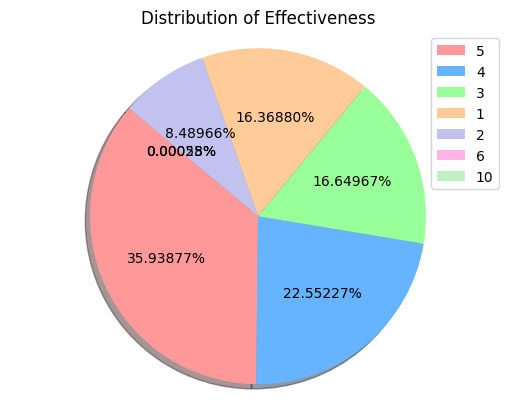

In [21]:
count = data['Effectiveness'].value_counts().to_list()
label = data['Effectiveness'].value_counts().index.to_list()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']
plt.pie(count, autopct='%.5f%%',shadow=True, colors = colors, startangle= 140)

plt.legend(label,loc = 'best')
plt.title('Distribution of Effectiveness')
plt.axis('equal')

plt.show()

Around 35% of drugs have an effectiveness of 5. The presence of error is evident from this pie chart

### **Distribution of Discrete features**

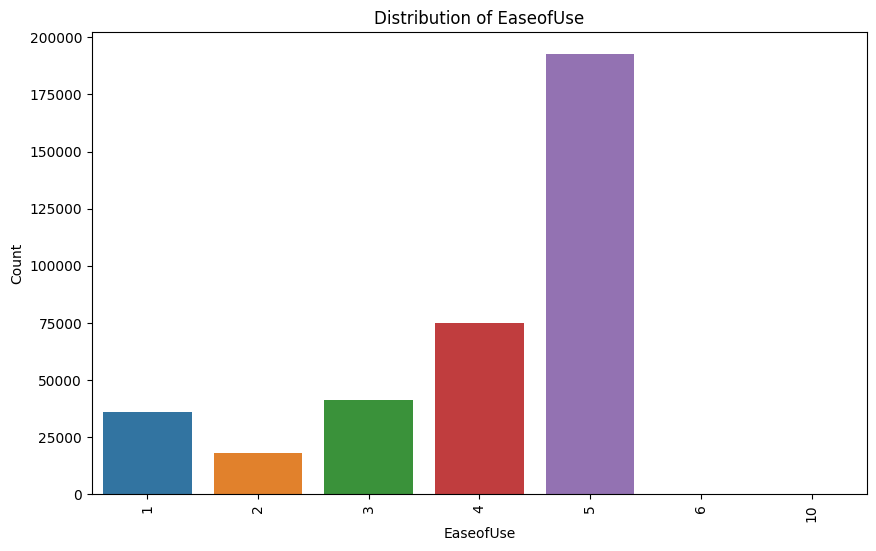

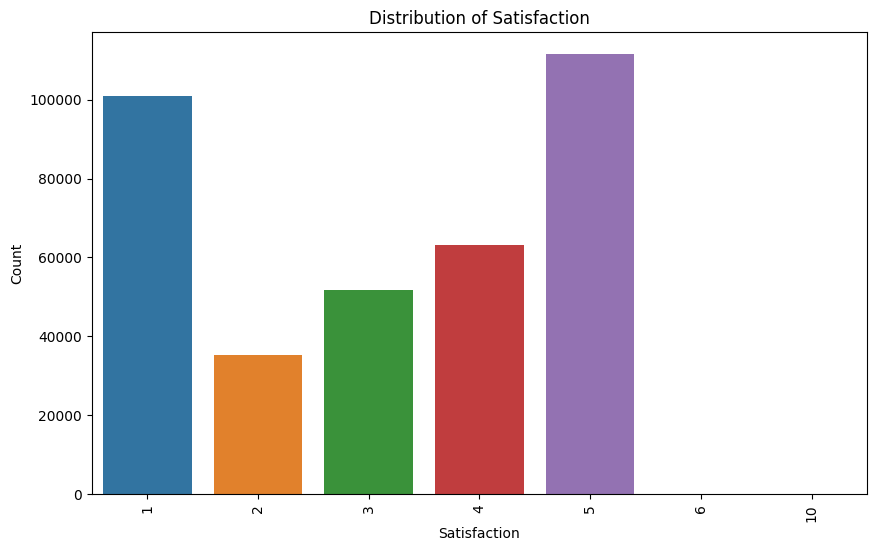

In [22]:
for col in ['EaseofUse','Satisfaction']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.xticks(rotation=90)
    plt.show()

*   There are more number of drugs with 5 rating for ease of use.
*   There are more no of drugs with 5 rating of satisfaction closely followed by drugs with a rating of 1



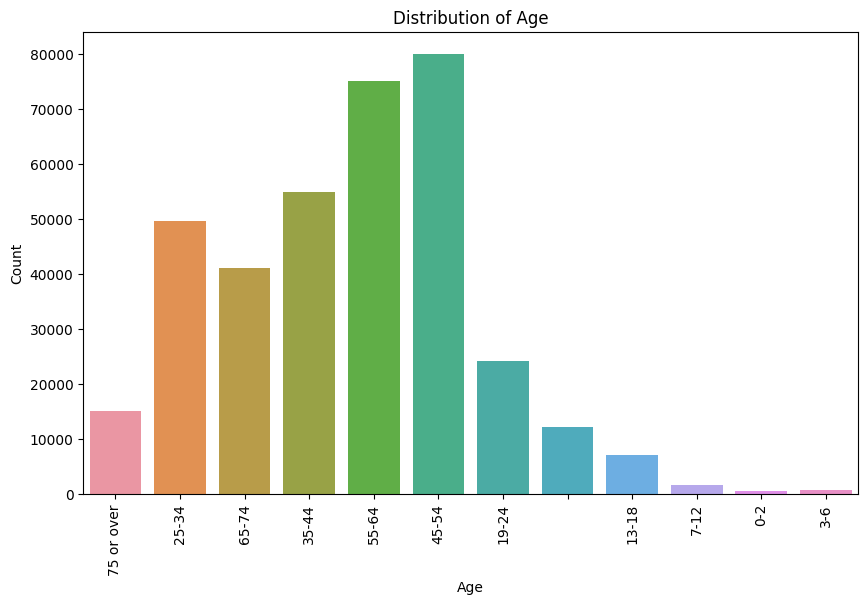

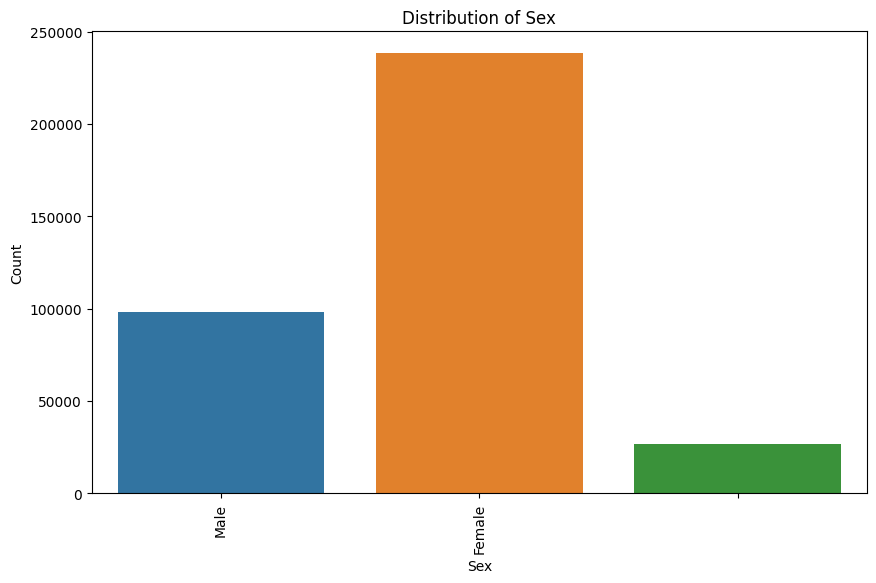

In [23]:
for col in ['Age', 'Sex']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.xticks(rotation=90)
    plt.show()



*   The dataset contains more entries from the age group 45-54 and least from 0-2 age group there is also the presence of some blank entries which will be dealt with during the preprocessing.
*   The dataset contain more number of females with a very samll number of blank entries as well




### **Data Analysis on Drugs**

#### Top 10 Used Drugs

In [24]:
df_drug = data['Drug'].value_counts().head(10)

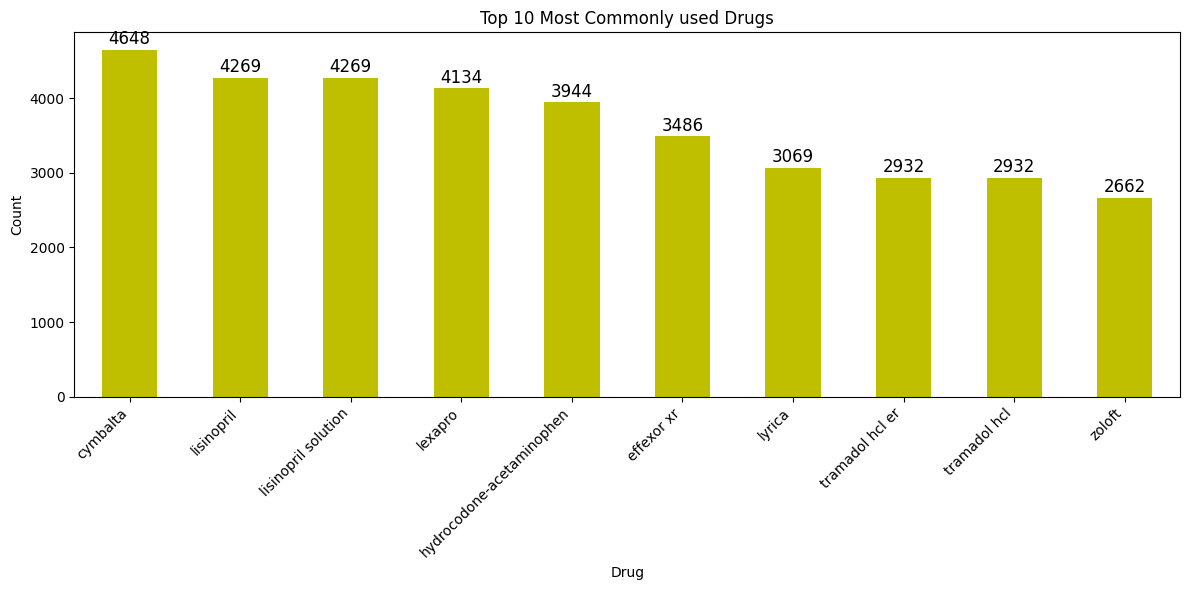

In [25]:
plt.figure(figsize=(12, 6))
df_drug.plot(kind='bar', color= 'y')

plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Top 10 Most Commonly used Drugs')


for i, count in enumerate(df_drug):
    plt.text(i, count + 20, str(count), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The most used drug is Cymbakta followed by lisinopril and lisinopril solution

#### Top 10 Drugs used by each group

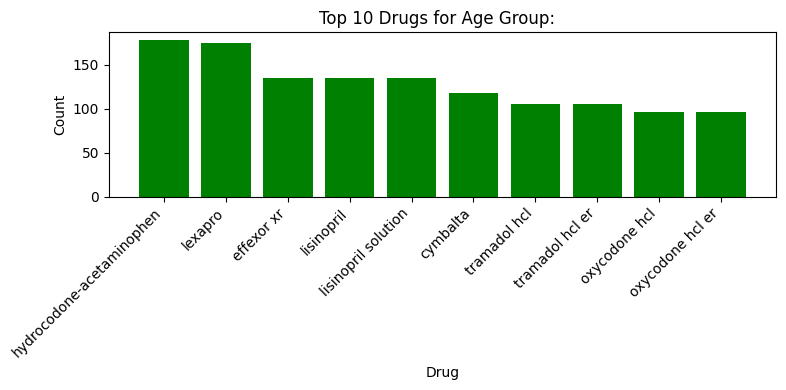

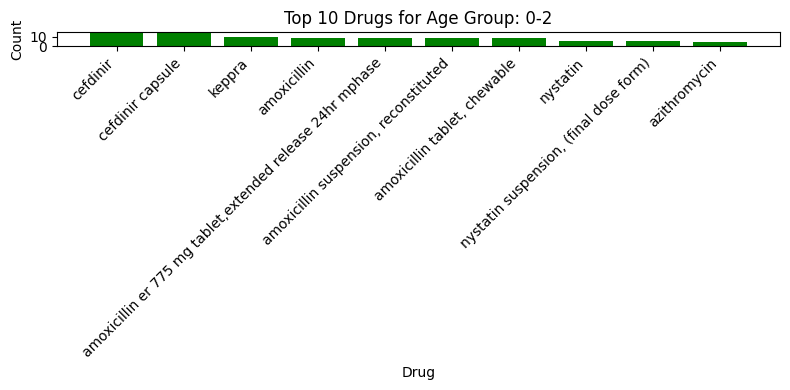

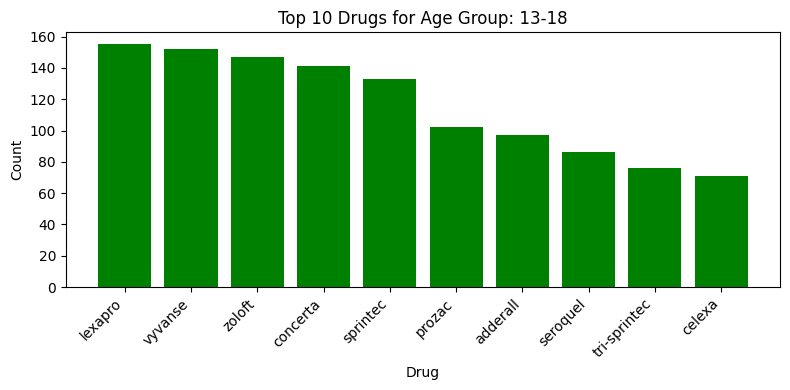

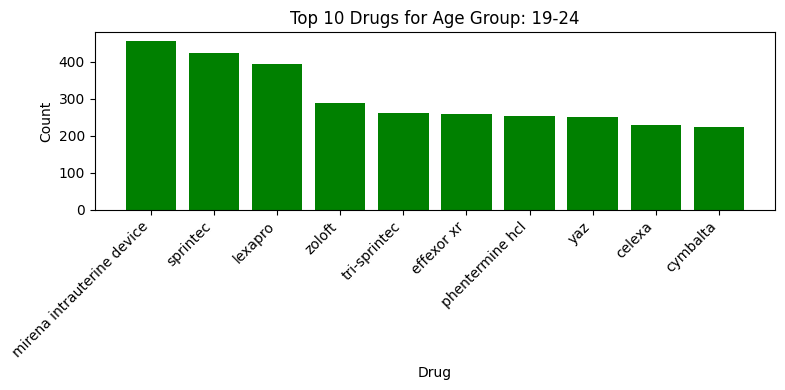

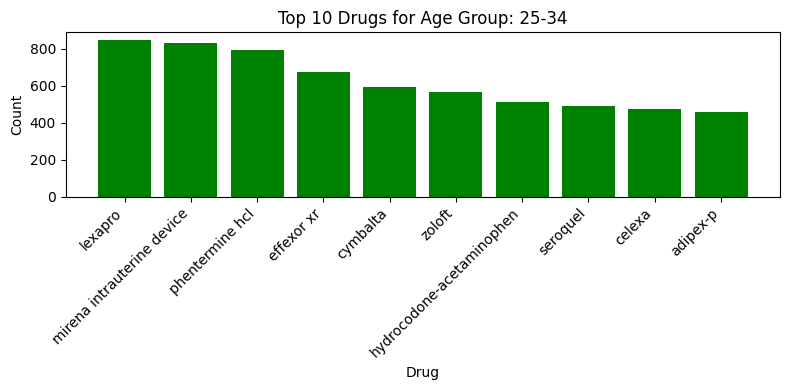

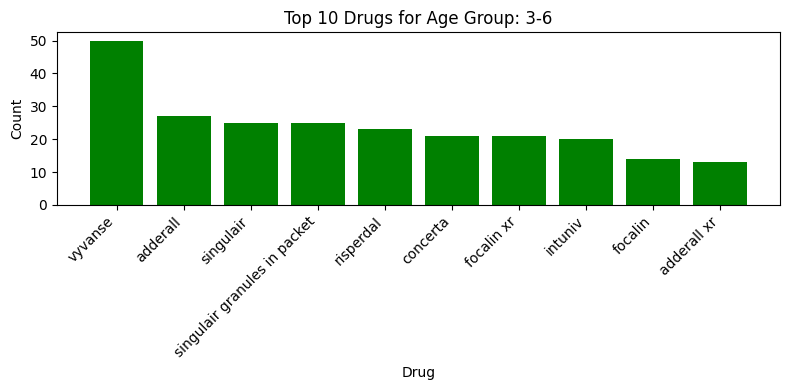

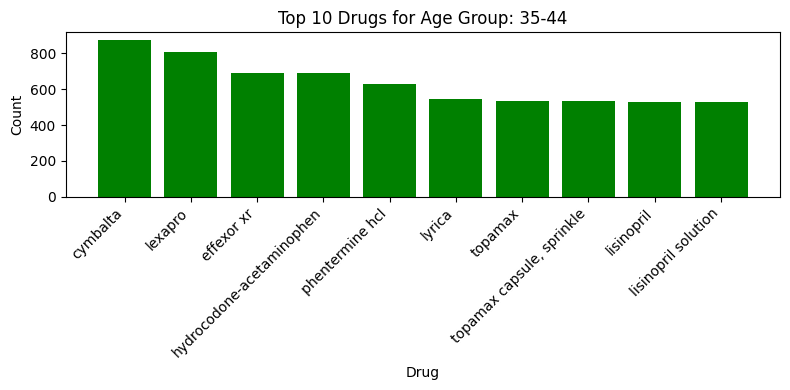

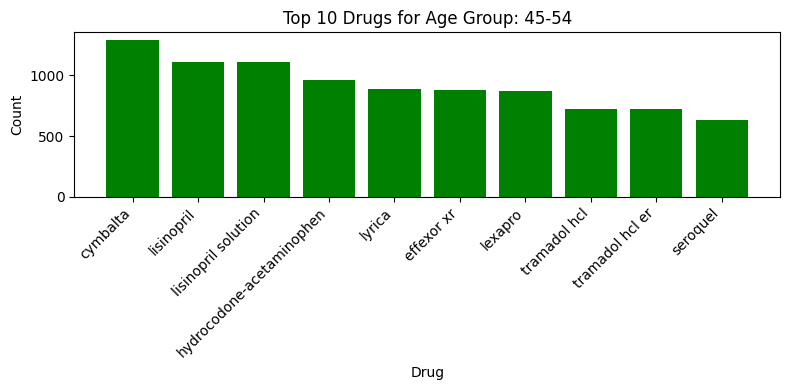

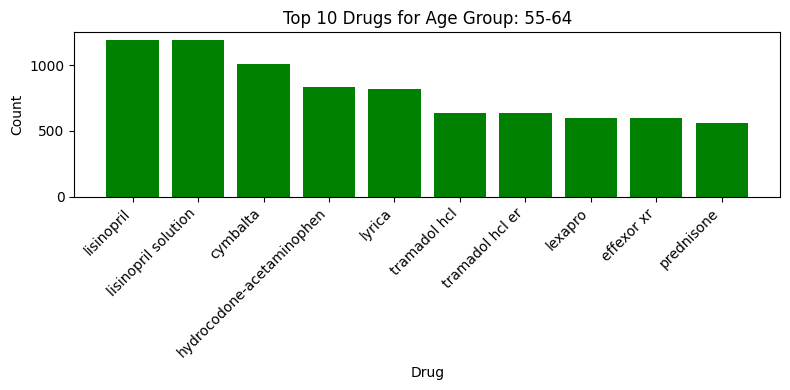

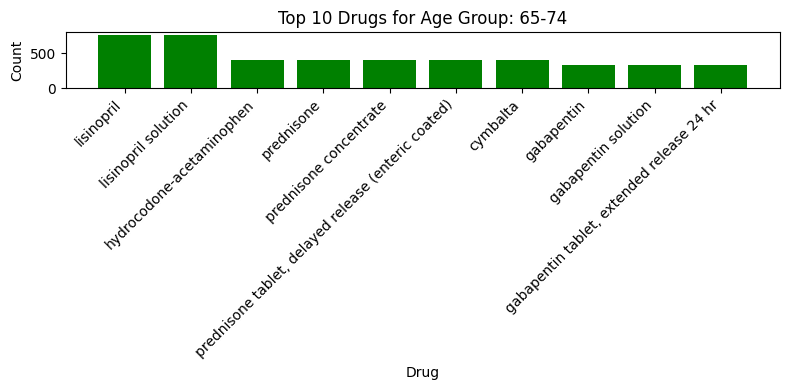

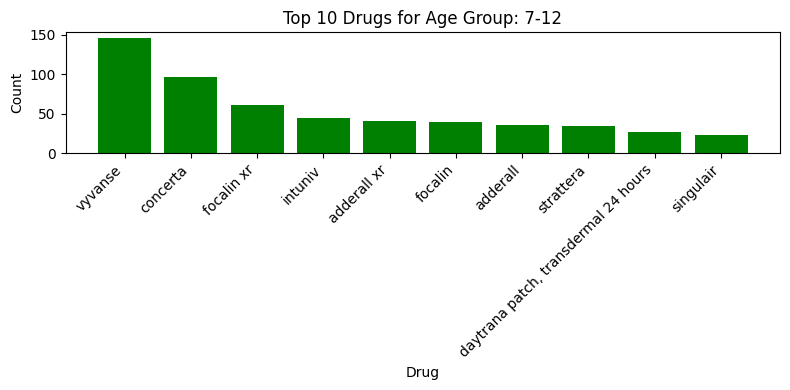

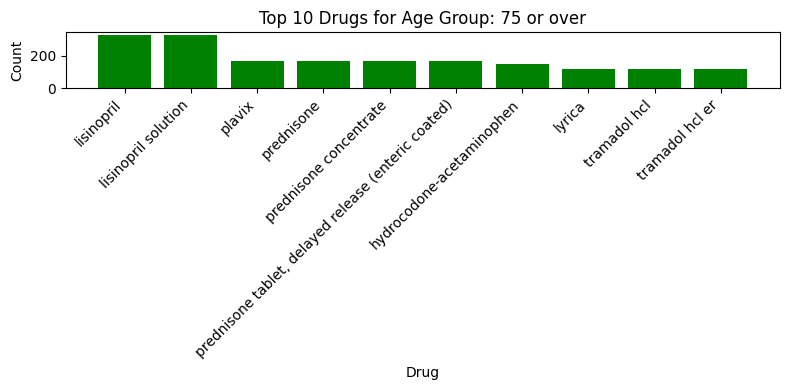

In [26]:
# Calculate the top 10 drugs for each age group
top_10_drugs_by_age_group = data.groupby('Age')['Drug'].value_counts().groupby(level=0, group_keys=False).nlargest(10).reset_index(name='Count')

# Get unique age groups
age_groups = top_10_drugs_by_age_group['Age'].unique()

# Create a separate bar plot for each age group
for age_group in age_groups:
    age_group_data = top_10_drugs_by_age_group[top_10_drugs_by_age_group['Age'] == age_group]

    plt.figure(figsize=(8, 4))
    plt.bar(age_group_data['Drug'], age_group_data['Count'], color = 'g')
    plt.xlabel('Drug')
    plt.ylabel('Count')
    plt.title(f'Top 10 Drugs for Age Group: {age_group}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



*   lisinoporil is the most used drug within the age groups 75 or over, 65-74 and 55- 64.
*   cymblata is the most used drugs for the age groups 45-54 and 34-44

*   Lexapro is most used in the age groups 25-34 and 13-18
*   vyvanse is commonly used in the age groups 3-6 and 7-12







#### Top 10 most and least effective drugs

In [27]:
df_effective = data.groupby('Effectiveness')
df_eff_5 = df_effective.get_group(5)
df_eff_1 = df_effective.get_group(1)

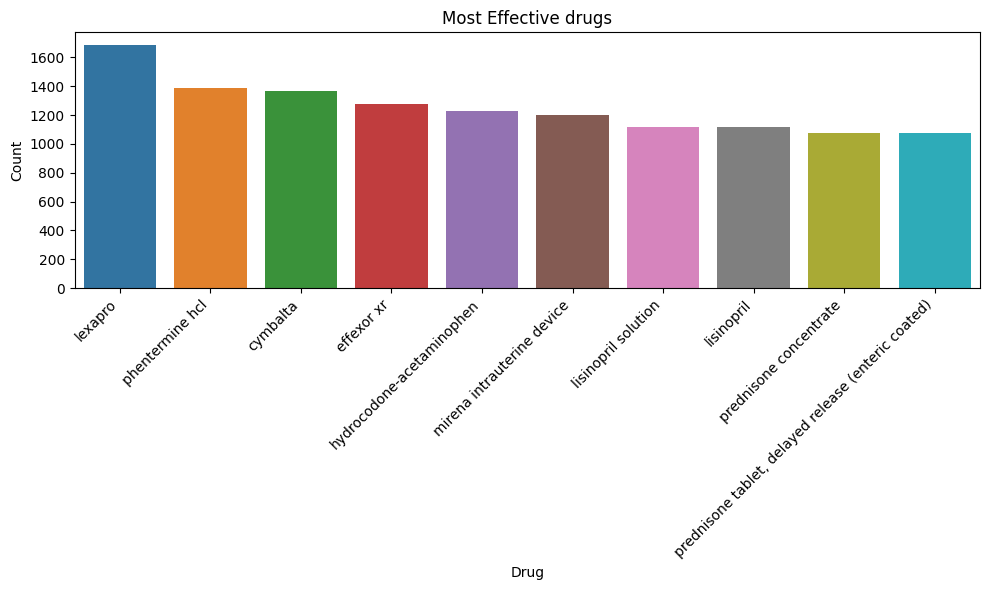

In [28]:
top_10_effective_drugs = df_eff_5['Drug'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eff_5, x='Drug',order = top_10_effective_drugs.index)
plt.xlabel('Drug')
plt.title('Most Effective drugs')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

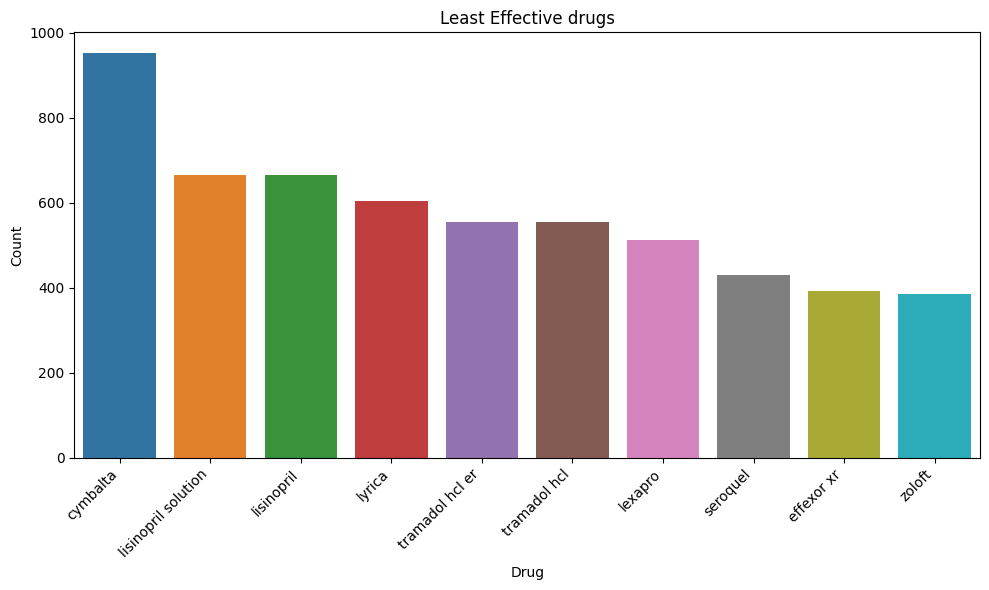

In [29]:
top_10_least_effective_drugs = df_eff_1['Drug'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eff_1, x='Drug',order = top_10_least_effective_drugs.index)
plt.xlabel('Drug')
plt.title('Least Effective drugs')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



*   It is quite evident that the most effective drug is lexapro. The second most effective drug is phentermine hcl
*   The least effective frug is cymnlata but it also happens to be the 3 most effective drug so it seems that people have recevied a mixed response from this drug



#### Top 10 most satisfying drugs

In [30]:
df_satisfaction = data.groupby('Satisfaction')
df_satis_5 = df_satisfaction.get_group(5)
df_satis_1 = df_satisfaction.get_group(1)

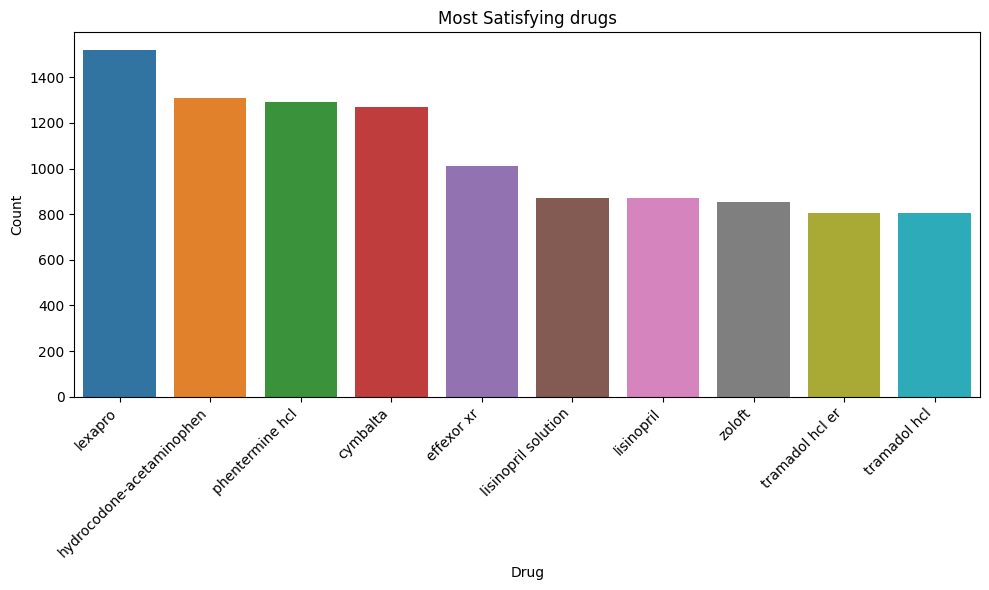

In [31]:
top_10_satisfying_drugs = df_satis_5['Drug'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_satis_5, x='Drug',order = top_10_satisfying_drugs.index)
plt.xlabel('Drug')
plt.title('Most Satisfying drugs')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

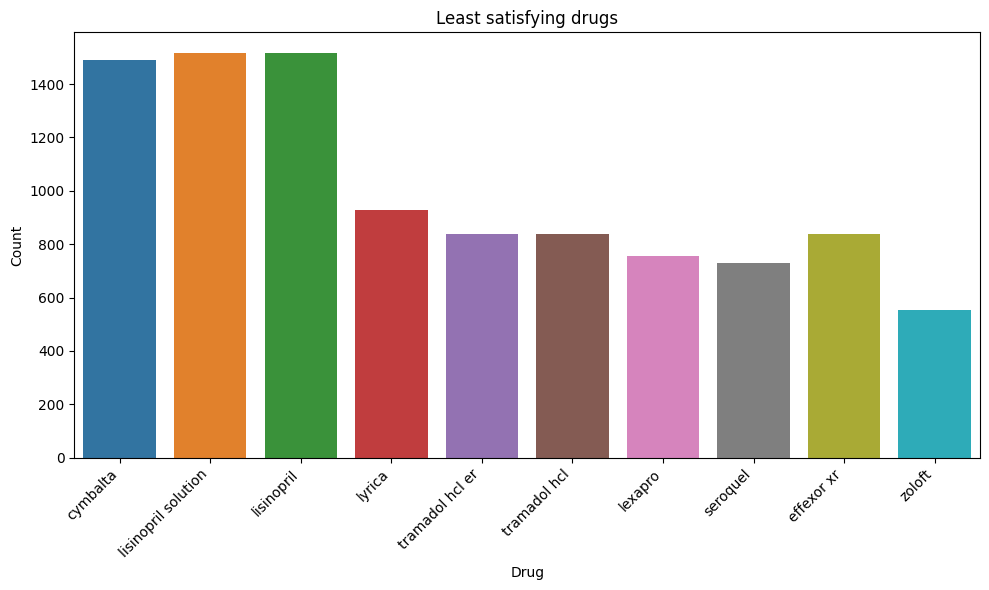

In [32]:
top_10_least_satisfying_drugs = df_eff_1['Drug'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_satis_1, x='Drug',order = top_10_least_satisfying_drugs.index)
plt.xlabel('Drug')
plt.title('Least satisfying drugs')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From these two plots we can draw a conclusion that a drug that is effective is definetily satisfying people and one that is not effective is not satisfying.
we can draw this conclusion because the plots for effective drugs is similar to the satisfying drugs


### **Data Analysis on Condition**

In [33]:
df_condition = data['Condition'].value_counts().head(10)

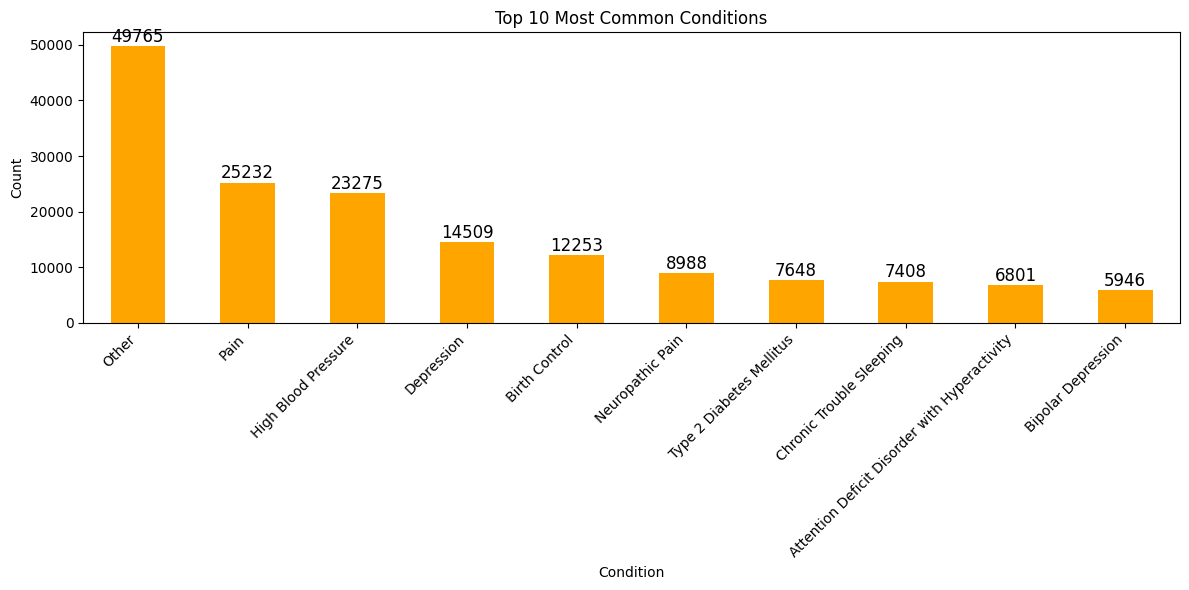

In [34]:

plt.figure(figsize=(12, 6))
df_condition.plot(kind='bar', color= 'orange')

plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top 10 Most Common Conditions')

for i, count in enumerate(df_condition):
    plt.text(i, count + 20, str(count), ha='center', va='bottom', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Common conditions for each gender

In [35]:
df_sex = data.groupby('Sex')
df_male = df_sex.get_group('Male')
df_female = df_sex.get_group('Female')

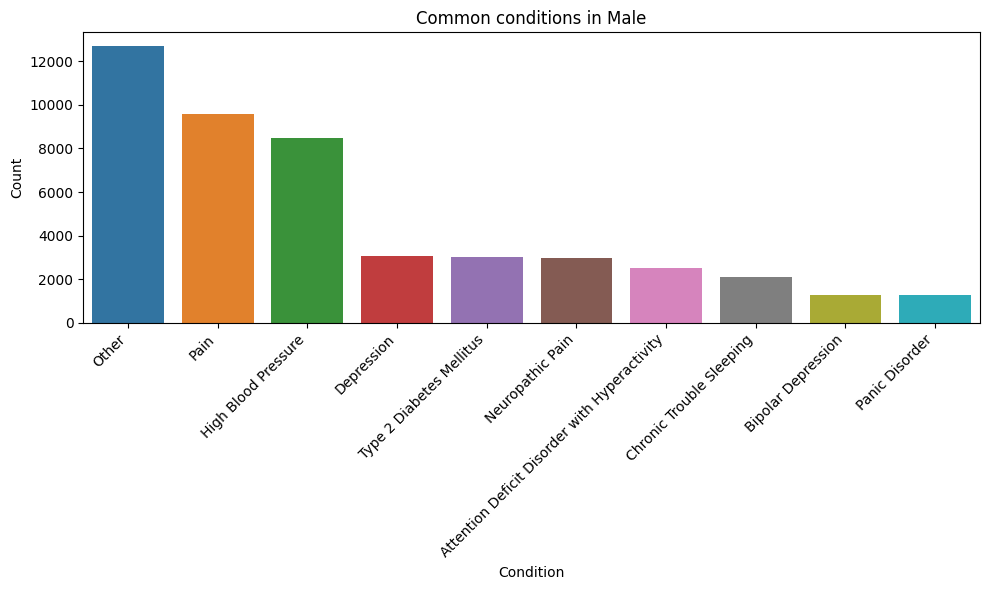

In [36]:

top_10_conditions_male = df_male['Condition'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.countplot(data=df_male, x='Condition', order=top_10_conditions_male.index)
plt.xlabel('Condition')
plt.title('Common conditions in Male')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

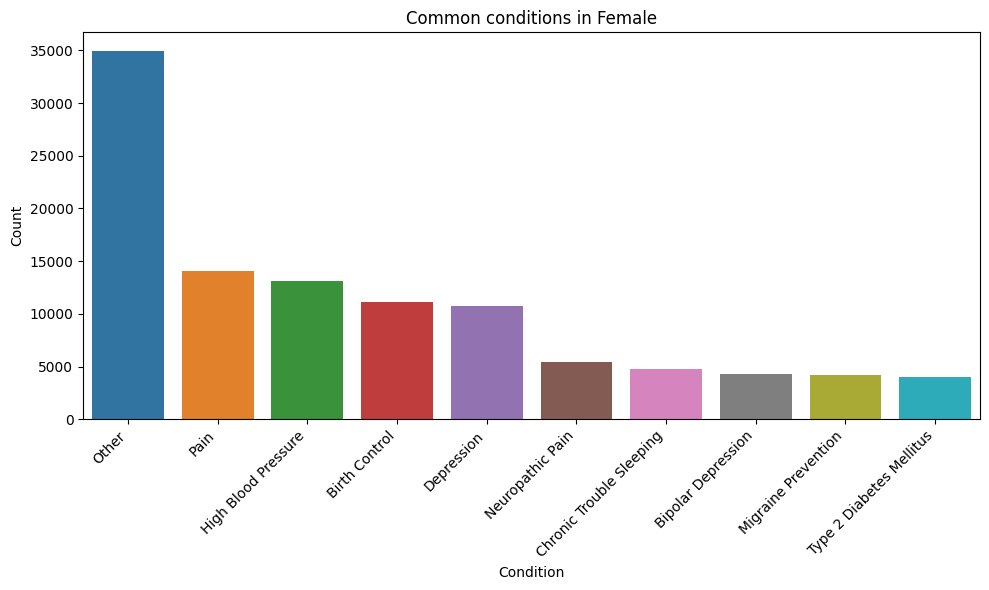

In [37]:

top_10_conditions_female = df_female['Condition'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.countplot(data=df_female, x='Condition', order=top_10_conditions_female.index)
plt.xlabel('Condition')
plt.title('Common conditions in Female')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Top 10 conditions for each age groups

In [38]:
df_age = data.groupby('Age')

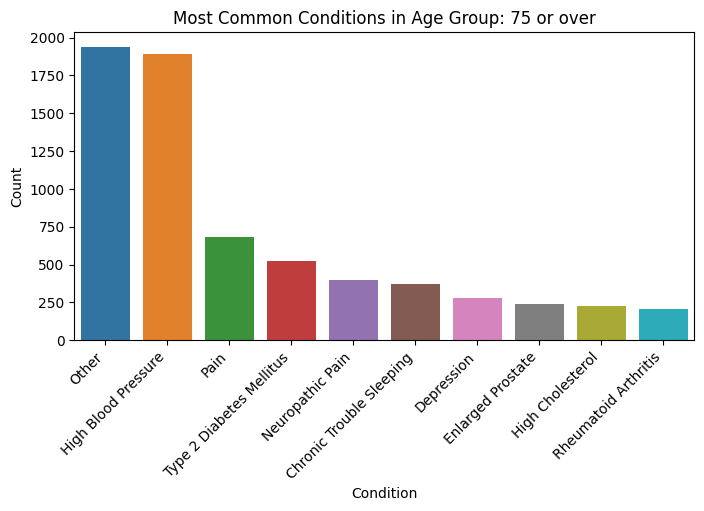

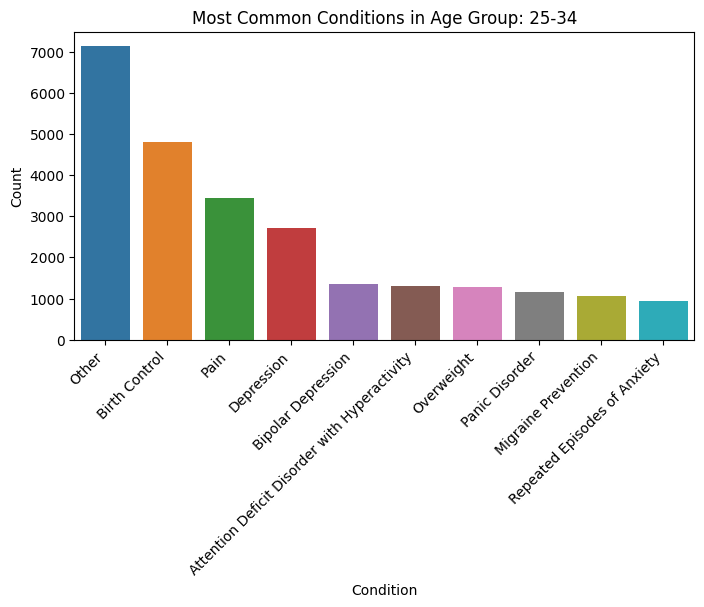

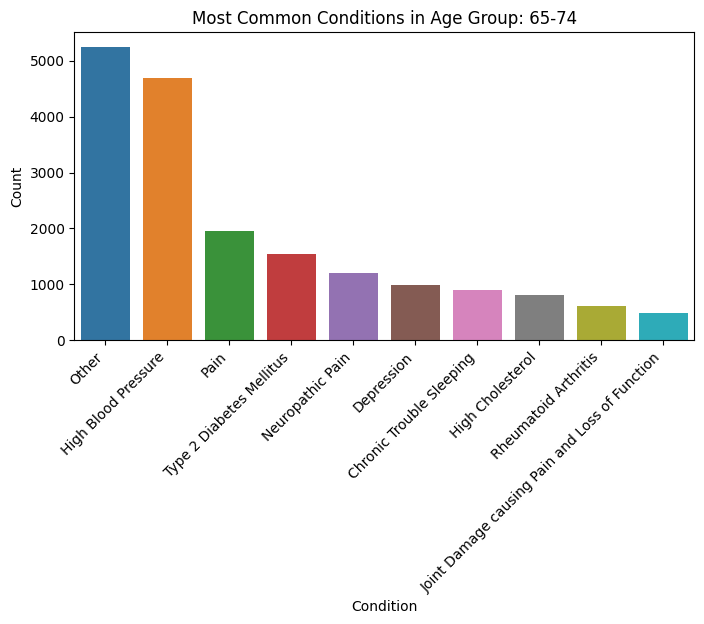

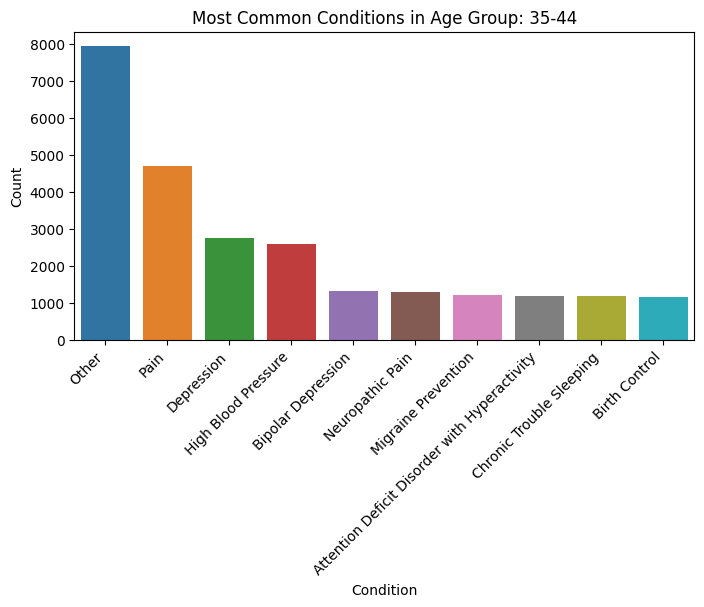

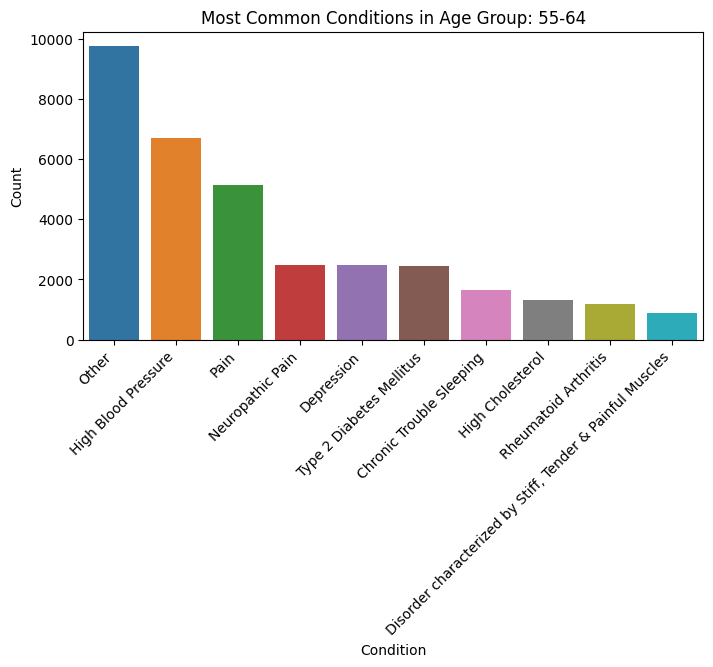

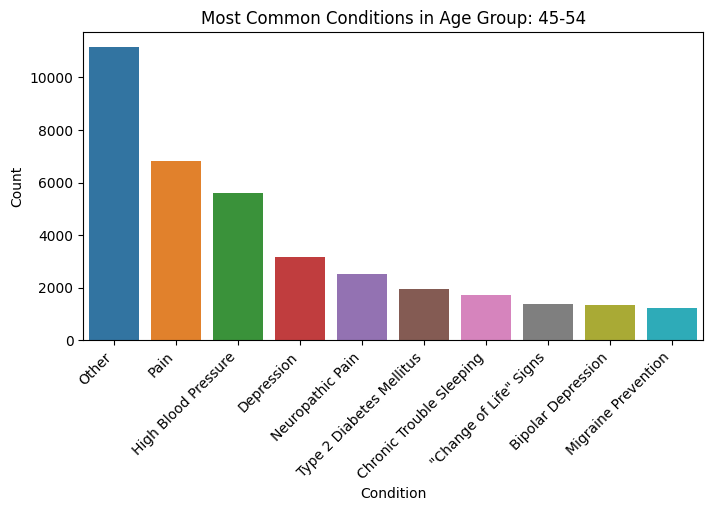

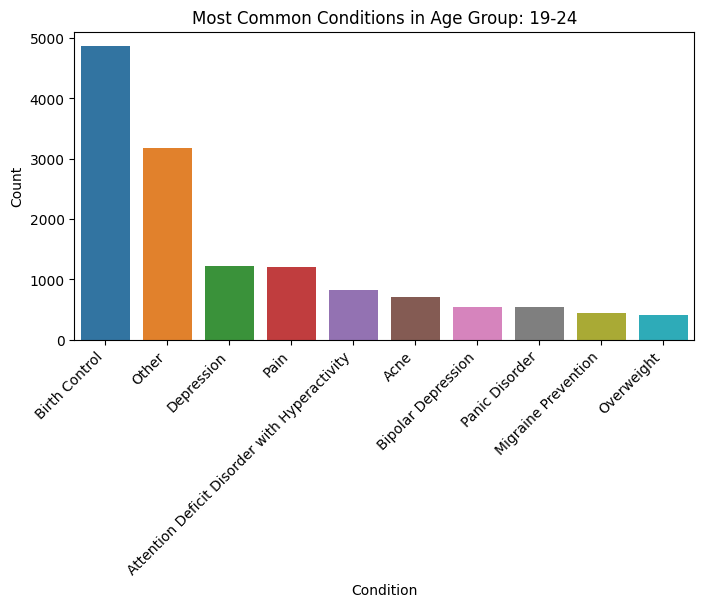

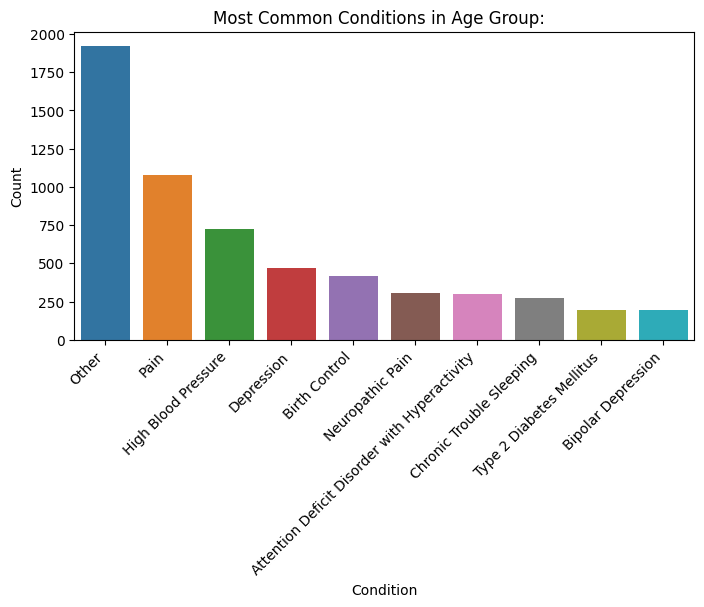

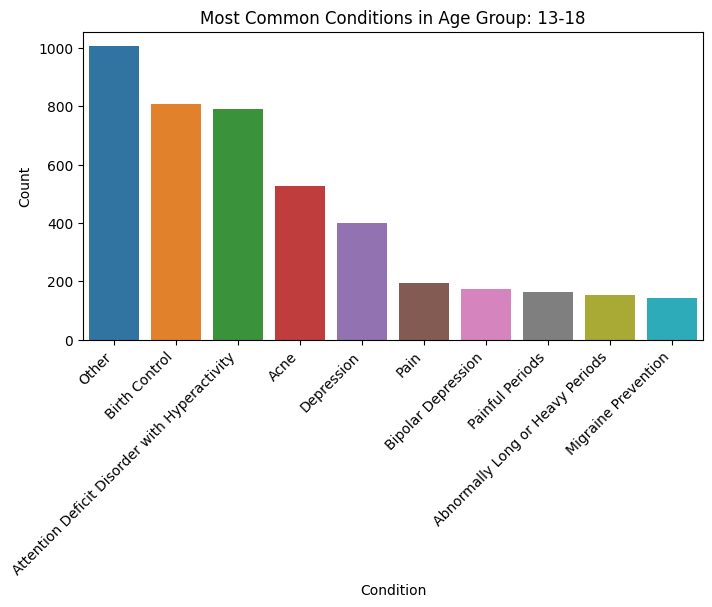

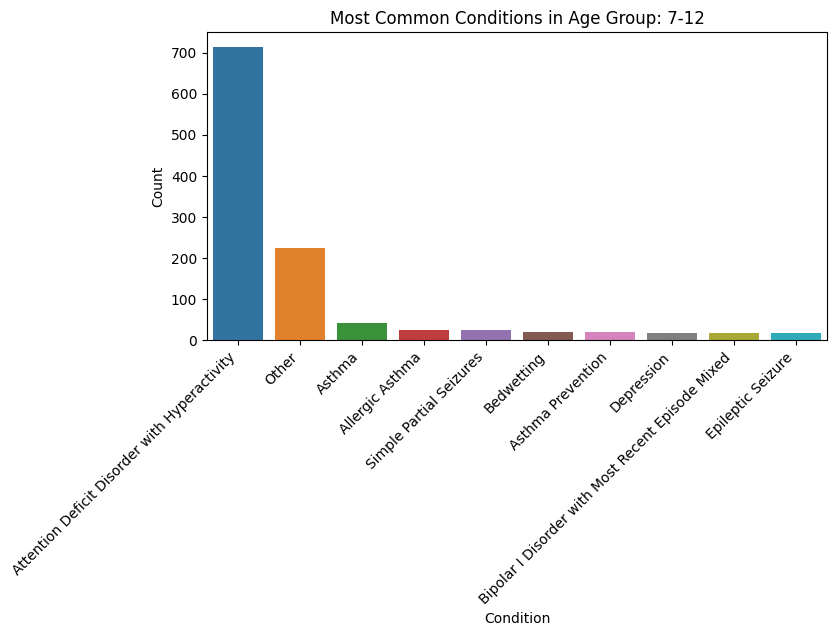

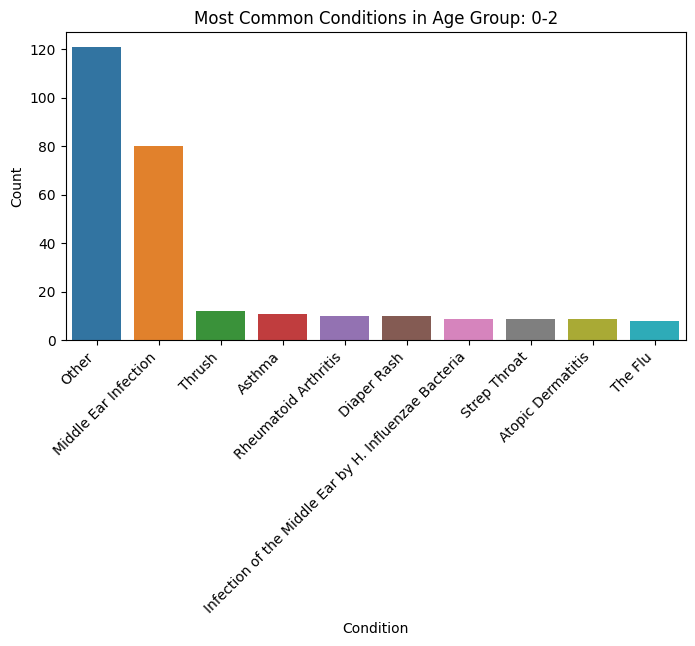

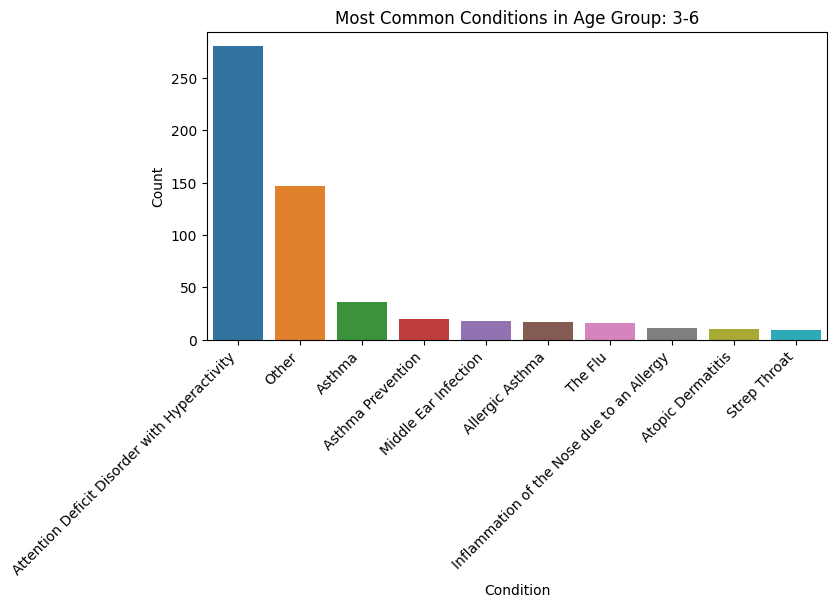

In [39]:
age_groups = ['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24', ' ', '13-18', '7-12', '0-2', '3-6']

# Create a list to store individual countplots
countplots = []

# Iterate through age groups and create countplots
for age_group in age_groups:
    df_age_group = df_age.get_group(age_group)

    # Calculate the top 10 most common conditions in the current age group
    top_10_conditions = df_age_group['Condition'].value_counts().head(10)

    # Create a countplot for the current age group
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_age_group, x='Condition', order=top_10_conditions.index)
    plt.xlabel('Condition')
    plt.title(f'Most Common Conditions in Age Group: {age_group}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')


    countplots.append(plt)


for countplot in countplots:
    countplot.show()

## **Data Preprocessing**

### Handling Missing Values and Blank Entries

In [40]:
# Replacing the blank spaces
data['Reviews'] = data['Reviews'].replace(r'^\s*$', 'No_reviews', regex=True)
data['Sides'].replace(' ', 'No_sides', inplace = True)

In [41]:
data['Age'] = data['Age'].replace(r'^\s*$', np.nan, regex=True)
data['Sex'] = data['Sex'].replace(r'\s+$', np.nan, regex = True)
data['Condition'] = data['Condition'].replace(r'^\s*$', 'Unknown', regex=True)

In [42]:
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews             37
Satisfaction         0
Sex              26537
Sides                0
UsefulCount          0
dtype: int64

In [43]:
# filling the remaining null values
for cols in ['Sex', 'Age']:
  data[cols] = data[cols].fillna(data[cols].mode().iloc[0])

In [44]:
data['Reviews'] = data['Reviews'].fillna('No_review')

In [45]:
data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

### Outlier Handling

In [46]:
# The values in the columns Satisfaction, EaseofUse and Effectiveness are supposed to be 5 star ratings but there are a few values above 5
column_names = ['Satisfaction', 'EaseofUse', 'Effectiveness']
indices = {}

for col in column_names:
    indices[col] = data[data[col] > 5].index

# Access the indices for each column
print(indices['Satisfaction'])
print(indices['EaseofUse'])
print(indices['Effectiveness'])

Int64Index([195073, 195282, 273577], dtype='int64')
Int64Index([195073, 195282, 273577], dtype='int64')
Int64Index([195073, 195282, 273577], dtype='int64')


In [47]:
# removing these entries
data = data.drop([195073, 195282, 273577])

### Feature Reduction

In [48]:
# Removing all the columns that are not necessary for the analysis
cols = ['Name', 'Age', 'Reviews', 'Date', 'Race', 'Sides', 'DrugId', 'UsefulCount']
data = data.drop(cols, axis = 1)

#### Modifing the Dataset

Since the dataset is too large and there are 7093 drugs, we cannot take all of them to build a model. We are developing three distinct models for the three most commonly prescribed drugs within the data. We know through analysis that the 3 drugs are cymbalta, lisinoporil and lisinoporil solution.

In [49]:
data_cym = data[data['Drug'] == 'cymbalta']
data_lisin = data[data['Drug'] == 'lisinopril']
data_lisin_sol = data[data['Drug'] == 'lisinopril solution']

### Encoding

In [50]:
le = LabelEncoder()
oh = OneHotEncoder()

We have two columns that should be encoded. They are Sex and Condition

In [51]:
def apply_one_hot_encoding(df, column_name):
    oh = OneHotEncoder(sparse=False)
    encoded_data = oh.fit_transform(df[[column_name]])
    column_names = oh.get_feature_names_out([column_name])
    encoded_df = pd.DataFrame(encoded_data, columns=column_names, index=df.index)

    df = df.drop(column_name, axis=1)
    df = pd.concat([df, encoded_df], axis=1)

    return df

# Apply one-hot encoding to 'Sex' column for each DataFrame
data_cym = apply_one_hot_encoding(data_cym, 'Sex')
data_lisin = apply_one_hot_encoding(data_lisin, 'Sex')
data_lisin_sol = apply_one_hot_encoding(data_lisin_sol, 'Sex')

In [52]:
# Applying the same function to the Condition column
data_cym = apply_one_hot_encoding(data_cym, 'Condition')
data_lisin = apply_one_hot_encoding(data_lisin, 'Condition')
data_lisin_sol = apply_one_hot_encoding(data_lisin_sol, 'Condition')

Now we have 3 different dataset for each drug since each dataset only contain a single drug we can remove that column as well

In [53]:
data_cym = data_cym.drop('Drug', axis = 1)
data_lisin = data_lisin.drop('Drug', axis = 1)
data_lisin_sol = data_lisin_sol.drop('Drug', axis = 1)

## Model Building

### Model for Cymblata

In [55]:
# seperating the target variable
y = data_cym['Effectiveness']
x = data_cym.drop('Effectiveness', axis = 1)

Splitting the data into training and validation datasets.

In [56]:
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.40)
x_test,x_val,y_test, y_val = train_test_split(x_test,y_test, random_state= 42, test_size= 0.50)

After working on different algorithms the best one for this dataset was found to be Support Vector Machine(SVM)

To find the best Hyperparameters I have used a custom function with Random search cv

In [57]:
def print_results_random(results):
    print('Best Params: {}\n'.format(results.best_params_))

    mean_scores = results.cv_results_['mean_test_score']
    std_scores = results.cv_results_['std_test_score']

    for mean_score, std_score, params in zip(mean_scores, std_scores, results.cv_results_['params']):
        print('{} +/- {} for {}'.format(round(mean_score, 3), round(std_score, 3), params))


In [58]:
svm_classifier = SVC(probability=True)

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1],
}


svm_random_search = RandomizedSearchCV(
    svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1
)

svm_random_search.fit(x_train, y_train)

print_results_random(svm_random_search)


Best Params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}

0.643 +/- 0.013 for {'kernel': 'linear', 'gamma': 1, 'C': 0.1}
0.643 +/- 0.013 for {'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}
0.632 +/- 0.003 for {'kernel': 'rbf', 'gamma': 1, 'C': 10}
0.629 +/- 0.014 for {'kernel': 'linear', 'gamma': 1, 'C': 1}
0.637 +/- 0.023 for {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
0.657 +/- 0.009 for {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
0.629 +/- 0.014 for {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
0.523 +/- 0.011 for {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}
0.629 +/- 0.014 for {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
0.643 +/- 0.013 for {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}


In [59]:
from sklearn.metrics import accuracy_score, precision_score

To check if the best params is actually giving us the best model we are selecting the best 3 models and then testing them on the validation set

In [61]:
svm = SVC(kernel='rbf', gamma=0.1, C=1)
model1 = svm.fit(x_train, y_train)
ypred1 = model1.predict(x_val)

accuracy = accuracy_score(ypred1, y_val)
precision = precision_score(ypred1, y_val, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.6763440860215054
Precision: 0.7511300720204158


In [63]:
svm = SVC(kernel='linear', gamma=0.01, C=0.1)
model2 = svm.fit(x_train, y_train)
ypred2 = model2.predict(x_val)

accuracy = accuracy_score(ypred2, y_val)
precision = precision_score(ypred2, y_val, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.6516129032258065
Precision: 0.7302330774146383


In [64]:
svm = SVC(kernel='rbf', gamma=0.1, C=0.1)
model2 = svm.fit(x_train, y_train)
ypred2 = model2.predict(x_val)

accuracy = accuracy_score(ypred2, y_val)
precision = precision_score(ypred2, y_val, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.6709677419354839
Precision: 0.7699635260435294


The best fit model is infact the best model Now twsting it with the testing set

In [65]:
svm = SVC(kernel='rbf', gamma=0.1, C=1)
final_model = svm.fit(x_train, y_train)
ypred_final = final_model.predict(x_test)

accuracy = accuracy_score(ypred_final, y_test)
precision = precision_score(ypred_final, y_test, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.6752688172043011
Precision: 0.7637926716416513


### Model for Lisinopril

In [66]:
y = data_lisin['Effectiveness']
x = data_lisin.drop('Effectiveness', axis = 1)

In [67]:
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state= 42, test_size= 0.40)
x_test,x_val,y_test, y_val = train_test_split(x_test,y_test, random_state= 42, test_size= 0.50)

Random forest algorithm was the best fit algorithm

In [70]:
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [5, 10, 50, 100, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # Add more hyperparameters as needed
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1
)

# Fit the RandomizedSearchCV object to your data
rf_random_search.fit(x_train, y_train)
print_results_random(rf_random_search)

Best Params: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 100, 'criterion': 'gini'}

0.549 +/- 0.015 for {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}
0.54 +/- 0.025 for {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}
0.582 +/- 0.008 for {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 100, 'criterion': 'gini'}
0.572 +/- 0.008 for {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'criterion': 'gini'}
0.578 +/- 0.008 for {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 100, 'criterion': 'entropy'}
0.574 +/- 0.01 for {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 100, 'criterion': 'gini'}
0.541 +/- 0.012 for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'criter

Chechking to find the best model by fitting them with the validation set

In [71]:
model1 = RandomForestClassifier( n_estimators = 10, min_samples_split= 2, min_samples_leaf= 2, max_depth= 100, criterion= 'gini')
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_val)

accuracy = accuracy_score(y_pred1, y_val)
precision = precision_score(y_pred1, y_val, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.5690866510538641
Precision: 0.6222492121279647


In [72]:
model2 = RandomForestClassifier( n_estimators = 10, min_samples_split= 10, min_samples_leaf= 1, max_depth= 100, criterion= 'entropy')
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_val)

accuracy = accuracy_score(y_pred2, y_val)
precision = precision_score(y_pred2, y_val, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.585480093676815
Precision: 0.6173776123874941


In [73]:
model3 = RandomForestClassifier( n_estimators = 200, min_samples_split= 2, min_samples_leaf= 2, max_depth= None, criterion= 'entropy')
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_val)

accuracy = accuracy_score(y_pred3, y_val)
precision = precision_score(y_pred3, y_val, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.5971896955503513
Precision: 0.6257257501118468


The best fit model was not the best model

In [74]:
model1_final = RandomForestClassifier( n_estimators = 200, min_samples_split= 2, min_samples_leaf= 2, max_depth= None, criterion= 'entropy')
model1_final.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

accuracy = accuracy_score(y_pred1, y_test)
precision = precision_score(y_pred1, y_test, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.5644028103044496
Precision: 0.6034611868055033


### Model for Lsininopril solution

In [77]:
y = data_lisin_sol['Effectiveness']
x = data_lisin_sol.drop('Effectiveness', axis = 1)

Random forest was the best Algorithm for this purpose

In [78]:
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [5, 10, 50, 100, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # Add more hyperparameters as needed
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1
)

# Fit the RandomizedSearchCV object to your data
rf_random_search.fit(x_train, y_train)
print_results_random(rf_random_search)

Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}

0.579 +/- 0.005 for {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'gini'}
0.577 +/- 0.01 for {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
0.569 +/- 0.01 for {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
0.575 +/- 0.012 for {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
0.542 +/- 0.014 for {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}
0.576 +/- 0.011 for {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 100, 'criterion': 'entropy'}
0.578 +/- 0.013 for {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth':

Fitting the best three model using the validation set

In [79]:
model1 = RandomForestClassifier(n_estimators = 50, min_samples_split = 2, min_samples_leaf = 4, max_depth =  10,  criterion = 'entropy')
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_val)

accuracy = accuracy_score(y_pred1, y_val)
precision = precision_score(y_pred1, y_val, average='weighted')

print('accuracy = {}'.format(accuracy))
print('precision = {}'.format(precision))

accuracy = 0.5983606557377049
precision = 0.6282163890315039


In [80]:
model2 = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 4, max_depth =  10,  criterion = 'gini')
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_val)

accuracy = accuracy_score(y_pred2, y_val)
precision = precision_score(y_pred2, y_val, average='weighted')

print('accuracy = {}'.format(accuracy))
print('precision = {}'.format(precision))

accuracy = 0.5995316159250585
precision = 0.6297160634557648


In [81]:
model3 = RandomForestClassifier(n_estimators = 500, min_samples_split = 10, min_samples_leaf = 1, max_depth =  10,  criterion = 'entropy')
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_val)

accuracy = accuracy_score(y_pred3, y_val)
precision = precision_score(y_pred3, y_val, average='weighted')

print('accuracy = {}'.format(accuracy))
print('precision = {}'.format(precision))

accuracy = 0.594847775175644
precision = 0.6232656203290895


Testing the best model with the test dataset

In [83]:
model1_final = RandomForestClassifier(n_estimators = 50, min_samples_split = 5, min_samples_leaf = 4, max_depth =  10,  criterion = 'gini')
model1_final.fit(x_train, y_train)
y_pred_final = model1.predict(x_test)

accuracy = accuracy_score(y_pred_final, y_test)
precision = precision_score(y_pred_final, y_test, average='weighted')

print('accuracy = {}'.format(accuracy))
print('precision = {}'.format(precision))

accuracy = 0.5784543325526932
precision = 0.6149072575637696


## Conclusion

The best algorithm for Cymbalta, Lisinopril and Lisinopril Solution are SVM and Random Forest Algorithm Respectively